In [1]:
import pandas as pd
import os

In [3]:
os.getcwd()

'c:\\Users\\larry\\Desktop\\Geoguessr ML Proj\\Geolocation-Project'

In [4]:
df = pd.read_csv("reverse_geocode3/input/misc_coords.csv")
len(df)

66414

In [5]:
df.head()

,name,latitude,longitude,city,country_code,address
0,8k-goog_0.jpg,35.075424,-106.674995,Albuquerque,US,NaN
1,8k-goog_1.jpg,35.075721,-106.663576,Albuquerque,US,NaN
2,8k-goog_2.jpg,35.075800,-106.636760,Albuquerque,US,NaN
3,8k-goog_3.jpg,35.075887,-106.644925,Albuquerque,US,NaN
4,8k-goog_4.jpg,35.076840,-106.631114,Albuquerque,US,NaN


In [7]:
len(df["city"].unique())

51

In [9]:
smaller = df.drop_duplicates(subset=['city'])
len(smaller)

51

In [ ]:
smaller.head()
smalle

,name,latitude,longitude,city,country_code,address
0,8k-goog_0.jpg,35.075424,-106.674995,Albuquerque,US,NaN
170,8k-goog_170.jpg,33.735279,-84.415244,Atlanta,US,NaN
345,8k-goog_345.jpg,30.275333,-97.734676,Austin,US,NaN
522,8k-goog_522.jpg,35.325429,-119.052823,Bakersfield,US,NaN
702,8k-goog_702.jpg,39.275810,-76.634144,Baltimorem,US,NaN


In [11]:
smaller.to_csv("reverse_geocode3/input/short.csv")

In [13]:
import geopandas as gpd
def load_shapefile_helper(filepath, usecols=None, bbox=None):
    """Internal helper to load shapefile with pyogrio fallback and CRS check."""
    if not os.path.exists(filepath):
         raise FileNotFoundError(f"Shapefile not found: {filepath}")
    try:
        gdf = gpd.read_file(filepath, engine='pyogrio', use_arrow=True, columns=usecols, bbox=bbox)
        # print(f"Loaded {os.path.basename(filepath)} using pyogrio.")
    except ImportError:
        gdf = gpd.read_file(filepath, columns=usecols, bbox=bbox)
        # print(f"Loaded {os.path.basename(filepath)} using fiona.")
    except Exception as e:
        print(f"Pyogrio failed ({e}), falling back to fiona for {os.path.basename(filepath)}.")
        gdf = gpd.read_file(filepath, columns=usecols, bbox=bbox)

    if gdf.crs != 'EPSG:4326':
        gdf = gdf.to_crs('EPSG:4326')
    return gdf

In [45]:
temp = load_shapefile_helper("reverse_geocode3/GMTED2010_Spatial_Metadata/GMTED2010_Spatial_Metadata.shp")
temp = temp.to_crs(3857)

In [46]:
temp.columns

Index(['ID', 'SOURCE_ORG', 'SOURCE', 'EL_SURFACE', 'NORTH', 'SOUTH', 'WEST',
       'EAST', 'X_SRCE_RES', 'Y_SRCE_RES', 'HORZ_UNIT', 'COORD_SYS',
       'HORZ_DATUM', 'VERT_DATUM', 'VERT_UNIT', 'MIN_ELEV', 'MAX_ELEV',
       'MEAN_ELEV', 'SDEV_ELEV', 'PROD_DATE', 'geometry'],
      dtype='object')

In [47]:
temp.head()

,ID,SOURCE_ORG,SOURCE,EL_SURFACE,NORTH,SOUTH,WEST,EAST,X_SRCE_RES,Y_SRCE_RES,...,COORD_SYS,HORZ_DATUM,VERT_DATUM,VERT_UNIT,MIN_ELEV,MAX_ELEV,MEAN_ELEV,SDEV_ELEV,PROD_DATE,geometry
0,268,Univ of Bristol,Ant Radar and Laser Alt DEM,Reflective,-55,-90,-180,180,1000.0,1000.0,...,Polar Sterographic,WGS 84,WGS 84,Meter,-82,4211,2152.694,1127.631,31Aug2011,"POLYGON ((-11534554.571 -12016612.018, -115345..."
1,269,Univ of Bristol,Ant Radar and Laser Alt DEM,Reflective,-55,-90,-180,180,1000.0,1000.0,...,Polar Sterographic,WGS 84,WGS 84,Meter,-82,4211,2152.694,1127.631,31Aug2011,"POLYGON ((-14101396.496 -12177789.547, -141013..."
2,270,Univ of Bristol,Ant Radar and Laser Alt DEM,Reflective,-55,-90,-180,180,1000.0,1000.0,...,Polar Sterographic,WGS 84,WGS 84,Meter,-82,4211,2152.694,1127.631,31Aug2011,"POLYGON ((-14080060.261 -12206641.477, -140800..."
3,271,Univ of Bristol,Ant Radar and Laser Alt DEM,Reflective,-55,-90,-180,180,1000.0,1000.0,...,Polar Sterographic,WGS 84,WGS 84,Meter,-82,4211,2152.694,1127.631,31Aug2011,"POLYGON ((-14005847.267 -12213070.02, -1400584..."
4,272,Univ of Bristol,Ant Radar and Laser Alt DEM,Reflective,-55,-90,-180,180,1000.0,1000.0,...,Polar Sterographic,WGS 84,WGS 84,Meter,-82,4211,2152.694,1127.631,31Aug2011,"POLYGON ((-11706172.12 -12123629.875, -1170617..."


In [48]:
len(temp)

1576038

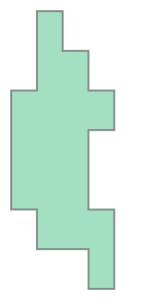

In [49]:
temp.iloc[3010]["geometry"]

In [50]:
areas = temp.geometry.area
areas

c:\Users\larry\Desktop\Geoguessr ML Proj\Geolocation-Project\venv\Lib\site-packages\shapely\measurement.py:44: RuntimeWarning: invalid value encountered in area
  return lib.area(geometry, **kwargs)


0          1.014636e+08
1          9.801762e+07
2          5.070645e+07
3          5.075113e+07
4          4.339247e+09
               ...     
1576033    4.364473e+10
1576034    4.638660e+10
1576035    4.951231e+10
1576036    5.310728e+10
1576037    8.393444e+10
Length: 1576038, dtype: float64

In [51]:
len(set(areas))

1450214

In [52]:
areas = areas.sort_values()

In [55]:
areas/1000000

704740     1.673039e-04
704738     1.673039e-04
704739     1.673039e-04
507178     1.769172e-04
507177     1.769172e-04
               ...     
700447     1.098666e+05
700450     1.098666e+05
700454     1.098666e+05
698058     3.413591e+07
1574419             NaN
Length: 1576038, dtype: float64

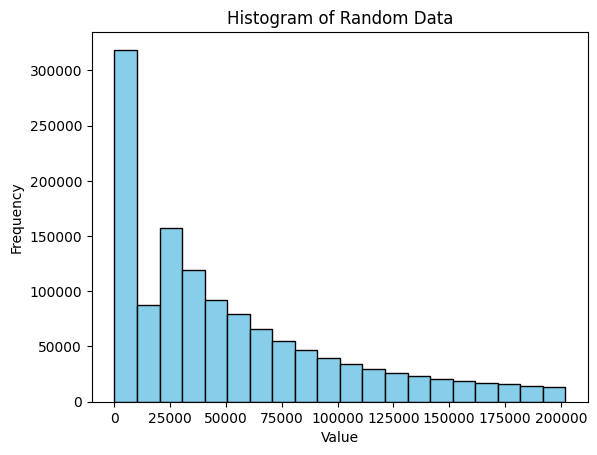

In [62]:
import matplotlib.pyplot as plt
import numpy as np

# Generate random data
data = areas[:len(areas)-300000]

# Create the histogram
plt.hist(data, bins=20, color='skyblue', edgecolor='black')

# Add title and labels
plt.title('Histogram of Random Data')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Show the histogram
plt.show()

In [2]:
df = pd.read_csv("reverse_geocode3/results/geocoded_combined_sampled_geodata.csv")
df.head()

,name,source,latitude,longitude,country_iso2,country_region,country_subregion,admin1_iso2,admin1_local_name,admin1_name,...,city_metro_id,city_metro_name,city_name,city_name_normalized,city_population,city_source,city_distance_km,climate_zone,land_cover_class,land_cover_probability
0,306753597767678,osv,-22.815043,-43.287328,BR,Americas,South America,BR,NaN,Rio de Janeiro,...,774ee03b19bf7acf,duque de caxias,Duque de Caxias,duque de caxias,818329.0,geonames,4.112,Tropical savanna climate (dry winter),Urban/Built-up,85.0
1,310681343890192,osv,-19.914459,-43.888012,BR,Americas,South America,BR,NaN,Minas Gerais,...,89940ee8fb72a10d,belo horizonte,Belo Horizonte,belo horizonte,2721564.0,geonames,5.258,Tropical savanna climate (dry winter),Urban/Built-up,86.0
2,770778933640024,osv,-18.285880,-39.955205,BR,Americas,South America,BR,NaN,Espírito Santo,...,5f0c553f3d521ec8,pedro canario,Pedro Canário,pedro canario,0.0,geonames,1.214,Tropical savanna climate (dry winter),Cultivated and Managed Vegetation,61.0
3,322578109288901,osv,-9.673240,-35.718752,BR,Americas,South America,BR,NaN,Alagoas,...,d5a08eae11ea4291,maceio,Maceió,maceio,1031597.0,geonames,1.990,Tropical monsoon climate,Urban/Built-up,68.0
4,584651635849668,osv,-13.349386,-39.874772,BR,Americas,South America,BR,NaN,Bahia,...,0fb4bef7793d3da5,santa ines,Santa Inês,santa ines,10520.0,geonames,8.755,Tropical savanna climate (dry winter),Cultivated and Managed Vegetation,84.0
